<a href="https://colab.research.google.com/github/AashishBomma/Electronic-Card-Transactions-2000-2023/blob/main/Electronic_Card_Transactions_2000_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [71]:
df = pd.read_csv("electronic-card-transactions-december-2023-csv-tables.csv")

### Data Profiling

In [72]:
df.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,ECTA.S19A1,2001.03,2462.5,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
1,ECTA.S19A1,2002.03,17177.2,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
2,ECTA.S19A1,2003.03,22530.5,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
3,ECTA.S19A1,2004.03,28005.1,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
4,ECTA.S19A1,2005.03,30629.6,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN


In [73]:
list(df.columns)

['Series_reference',
 'Period',
 'Data_value',
 'Suppressed',
 'STATUS',
 'UNITS',
 'Magnitude',
 'Subject',
 'Group',
 'Series_title_1',
 'Series_title_2',
 'Series_title_3',
 'Series_title_4',
 'Series_title_5']

In [74]:
df.describe()

,Period,Data_value,Magnitude,Series_title_4,Series_title_5
count,20124.000000,1.813500e+04,20124.000000,0.0,0.0
mean,2012.250457,1.656121e+07,4.215564,NaN,NaN
std,6.542818,8.924288e+07,2.742769,NaN,NaN
min,2000.010000,-5.130000e+01,0.000000,NaN,NaN
25%,2007.030000,1.773500e+02,0.000000,NaN,NaN
50%,2012.090000,1.217100e+03,6.000000,NaN,NaN
75%,2018.050000,4.457800e+03,6.000000,NaN,NaN
max,2023.120000,1.912408e+09,6.000000,NaN,NaN


In [75]:
df = df.drop(['Series_title_3','Series_title_4','Series_title_5'], axis = 1)

In [76]:
list(df.columns)

['Series_reference',
 'Period',
 'Data_value',
 'Suppressed',
 'STATUS',
 'UNITS',
 'Magnitude',
 'Subject',
 'Group',
 'Series_title_1',
 'Series_title_2']

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20124 entries, 0 to 20123
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  20124 non-null  object 
 1   Period            20124 non-null  float64
 2   Data_value        18135 non-null  float64
 3   Suppressed        868 non-null    object 
 4   STATUS            20124 non-null  object 
 5   UNITS             20124 non-null  object 
 6   Magnitude         20124 non-null  int64  
 7   Subject           20124 non-null  object 
 8   Group             20124 non-null  object 
 9   Series_title_1    20124 non-null  object 
 10  Series_title_2    20124 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.7+ MB


In [78]:
df['Period']=pd.to_datetime(df['Period'].astype('string'))

In [79]:
df.isnull().sum()

Series_reference        0
Period                  0
Data_value           1989
Suppressed          19256
STATUS                  0
UNITS                   0
Magnitude               0
Subject                 0
Group                   0
Series_title_1          0
Series_title_2          0
dtype: int64

In [80]:
df.duplicated().sum()

92

### Handling missing values

In [81]:
df.Suppressed.fillna('N', inplace = True)

In [82]:
#df['Data_value'].fillna(value = df['Data_value'].mean(), inplace = True)

### Handling outliers

In [83]:
# plt.boxplot(df['Data_value'])
# plt.title('Data_value')
# plt.show

In [84]:
# iqr = df['Data_value'].quantile(0.75) - df['Data_value'].quantile(0.25)

# df = df[(df['Data_value'] > df['Data_value'].quantile(0.25)-1.5*iqr) | (df['Data_value'] < df['Data_value'].quantile(0.75)+1.5*iqr)]

In [85]:
#df.info()
# plt.boxplot(df['Data_value'])
# plt.title('Data_value')
# plt.show

### Inspecting the variables for inconsistencies

In [86]:
df.STATUS.unique()

array(['F', 'C', 'R', 'P'], dtype=object)

In [87]:
df.UNITS.unique()

array(['Dollars', 'Number', 'Percent'], dtype=object)

In [88]:
df.Subject.unique()

array(['Electronic Card Transactions (ANZSIC06) - ECT'], dtype=object)

In [89]:
df.Group.unique()

array(['Total values - Electronic card transactions A/S/T by division',
       'Values - Electronic card transactions A/S/T by industry group',
       'Number of electronic card transactions A/S/T by division',
       'Electronic card transactions by mean and proportion',
       'Totals - Electronic card transactions by division, percentage changes'],
      dtype=object)

In [90]:
df.Series_title_1.unique()

array(['Actual', 'Seasonally adjusted', 'Trend'], dtype=object)

In [91]:
df.Series_title_2.unique()

array(['RTS total industries', 'RTS core industries', 'Total', 'Credit',
       'Debit', 'Consumables', 'Durables', 'Hospitality', 'Services',
       'Apparel', 'Motor vehicles excl. fuel', 'Fuel',
       'Non-retail excl. services', 'Mean transaction value',
       'Mean value of transaction per person',
       'Mean number of transactions per person',
       'ECT core retail as a proportion of core Retail Trade Survey',
       'ECT retail as a proportion of total Retail Trade Survey',
       'Credit card usage as a proportion of total ECT value',
       'Debit card usage as a proportion of total ECT value'],
      dtype=object)

### Normalizing variables

### Bivariate Analysis

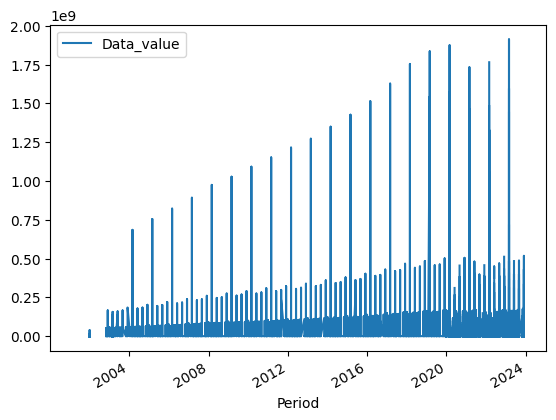

In [92]:
#between Period and Data_value

df.plot.line(x='Period', y='Data_value')
plt.show()

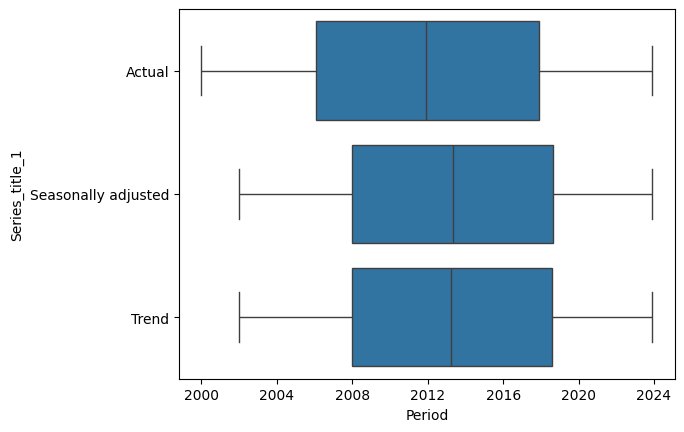

In [93]:
#between Series_title_1 and Period

sns.boxplot(x='Period' , y='Series_title_1', data=df)
plt.show()

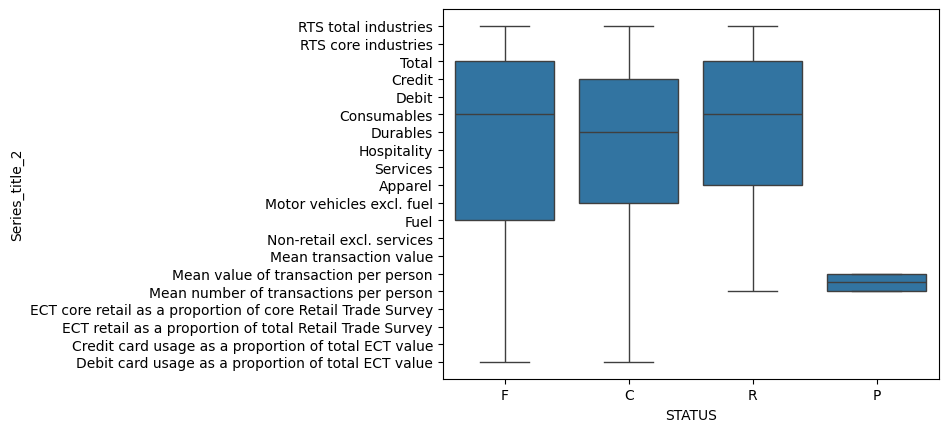

In [94]:
#between STATUS and Series_title_2

sns.boxplot(x='STATUS' , y='Series_title_2', data=df)
plt.show()

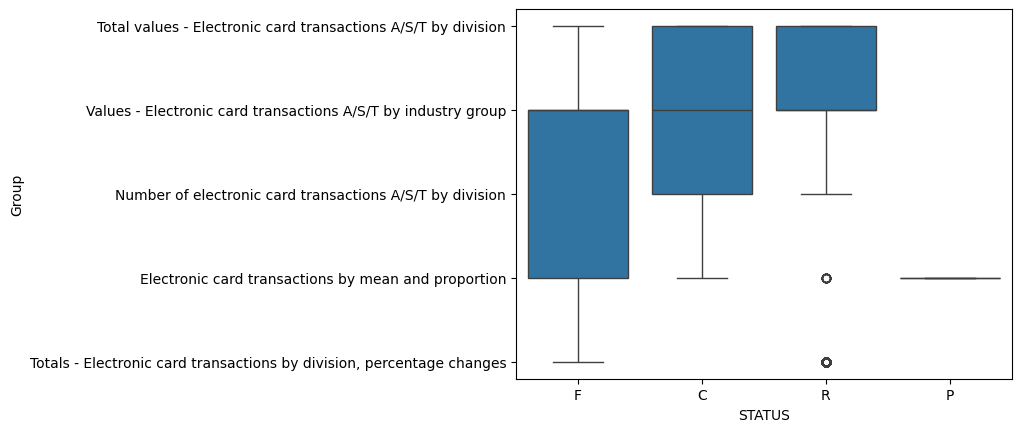

In [95]:
#between Group and STATUS

sns.boxplot(x='STATUS' , y='Group' ,  data=df)
plt.show()

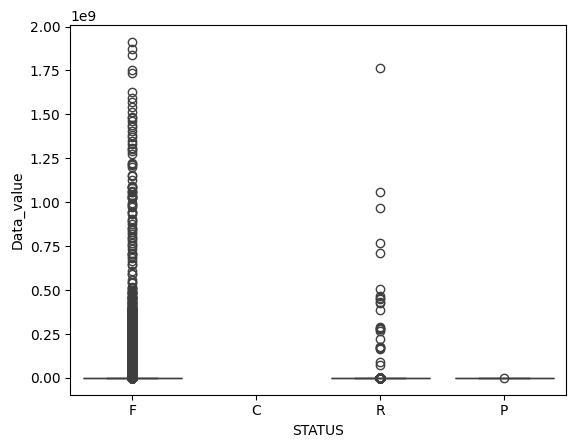

In [96]:
sns.boxplot(x='STATUS' , y='Data_value' , data=df)
plt.show()

### Multivariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

<ipython-input-97-d46d5408fa76>:3: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



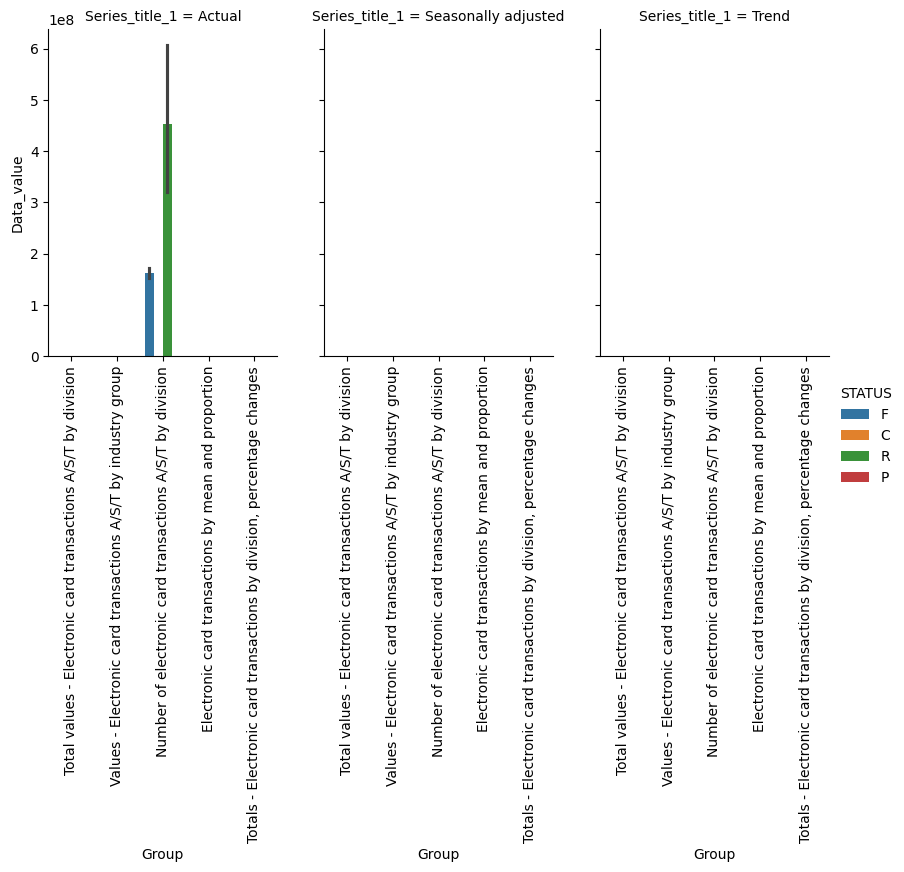

In [97]:
g = sns.catplot(x='Group' , y='Data_value' , hue='STATUS' , col= 'Series_title_1', data=df , kind='bar', height=4 , aspect=0.7)
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

### Data Analysis

In [98]:
#Total Yearly Transaction Amount

df_period_datavalue = df[df['UNITS']=='Dollars']

df_period_datavalue = df_period_datavalue.groupby(df_period_datavalue['Period'].dt.year)['Data_value'].sum()
#list(df_period_datavalue.columns)

# df.plot.bar(x='Period' , y='Data_value')
# plt.show()

fig = px.bar(x=df_period_datavalue.index, y=df_period_datavalue , title='Total Yearly Transaction Amount')
fig.show()

In [99]:
#Group wise spending

df_group_data = df[df['UNITS']=='Dollars']
df_group_data = df_group_data.groupby('Group')['Data_value'].sum()
df_group_data
fig = px.pie(df, values=df_group_data, names=df_group_data.index, title="Group wise spending")
fig.show()

In [100]:
#Distribution of spending in the year 2023

df_2023 = df[(df['UNITS'] == 'Dollars') & (df['Period'] == '2023') & (df['Series_title_2'] != 'Total') & (df['Series_title_2'] != 'Mean transaction value') & (df['Series_title_2'] != 'Credit') & (df['Series_title_2'] != 'Debit')]

fig = px.pie(df_2023, values=df_2023['Data_value'], names=df_2023['Series_title_2'], title='2023 Year spending')
fig.show()

In [101]:
#2022 vs 2023 spending

df_2022_2023 = df[(df['Period'].dt.year == 2022) | (df['Period'].dt.year == 2023)]
df_2022_2023 = df_2022_2023[(df_2022_2023['UNITS'] == 'Dollars') & (df_2022_2023['Series_title_2'] != 'Total') & (df_2022_2023['Series_title_2'] != 'Mean transaction value') & (df_2022_2023['Series_title_2'] != 'Credit') & (df_2022_2023['Series_title_2'] != 'Debit')]


df_2022_2023 = df_2022_2023.groupby([df_2022_2023['Period'].dt.year,'Series_title_2'])['Data_value'].sum().reset_index()

fig = px.bar(df_2022_2023, x='Series_title_2', y='Data_value', color='Period', barmode='group', title='2022 vs 2023 spending')
fig.show()

In [102]:
#Distribution of spending from 2000 to 2023

df_allyears = df[(df['UNITS'] == 'Dollars') & (df['Series_title_2'] != 'Total') & (df['Series_title_2'] != 'Mean transaction value') & (df['Series_title_2'] != 'Credit') & (df['Series_title_2'] != 'Debit')]

df_allyears = df_allyears.groupby([df_allyears['Period'].dt.year,'Series_title_2'])['Data_value'].sum().reset_index()

fig = px.line(df_allyears, x='Series_title_2', y='Data_value', color='Period', title='Distribution of spending from 2000 to 2023')
fig.show()

In [103]:
df_2022_2023_diff = df[(df['Period'].dt.year == 2022) | (df['Period'].dt.year == 2023)]
df_2022_2023_diff = df_2022_2023_diff[(df_2022_2023_diff['UNITS'] == 'Dollars') & (df_2022_2023_diff['Series_title_2'] != 'Total') & (df_2022_2023_diff['Series_title_2'] != 'Mean value of transaction per person') & (df_2022_2023_diff['Series_title_2'] != 'Mean transaction value') & (df_2022_2023_diff['Series_title_2'] != 'Credit') & (df_2022_2023_diff['Series_title_2'] != 'Debit')]


df_2022_2023_diff = pd.pivot_table(df_2022_2023_diff, columns=df_2022_2023_diff['Period'].dt.year,  values='Data_value', index='Series_title_2', aggfunc=sum)
df_2022_2023_diff = df_2022_2023_diff.rename(index={0:'2022', 1:'2023'})
df_2022_2023_diff = df_2022_2023_diff.fillna(0)
list(df_2022_2023_diff.columns)
df_2022_2023_diff['Percentage change'] = ((df_2022_2023_diff[2023]-df_2022_2023_diff[2022])/df_2022_2023_diff[2023])*100
df_2022_2023_diff

Period,2022,2023,Percentage change
Series_title_2,,,
Apparel,19932.4,20462.3,2.589640
Consumables,145460.8,155156.7,6.249102
Durables,98902.8,99242.8,0.342594
Fuel,34796.1,34133.0,-1.942695
Hospitality,38638.3,44567.1,13.303087
Motor vehicles excl. fuel,12120.7,12528.5,3.254979
Non-retail excl. services,109387.5,126084.7,13.242844
RTS core industries,325883.6,345160.8,5.584991
RTS total industries,372728.0,391659.9,4.833760
